**Load data from csv file**

In [1]:
import pandas as pd # load dataset 
import matplotlib.pyplot as plt
import seaborn as sns # generate heat map
tableA = pd.read_csv('../3. Dataset No Outlier File/MeterA_no_outlier.csv', header='infer') # read MeterA csv file
tableA.drop(tableA.filter(regex="Unname"),axis=1, inplace=True)
tableB = pd.read_csv('../3. Dataset No Outlier File/MeterB_no_outlier.csv', header='infer') # read MeterB csv file
tableB.drop(tableB.filter(regex="Unname"),axis=1, inplace=True)
tableC = pd.read_csv('../3. Dataset No Outlier File/MeterC_no_outlier.csv', header='infer') # read MeterC csv file
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableC

Unnamed: 0  Profile factor  Symmetry  Crossflow  Flow Velocity1  \
0             0        1.102690  1.004425   1.006741       15.228611   
1             1        1.101432  1.003722   1.008256       14.106667   
2             2        1.098568  1.002528   1.009103       14.136667   
3             3        1.099516  1.007024   1.009363       14.146389   
4             4        1.100336  1.000661   1.006709       14.056944   
..          ...             ...       ...        ...             ...   
147         147        1.106850  0.993131   1.003427        5.231389   
148         148        1.106124  0.994477   1.002730        9.273056   
149         149        1.103042  0.996682   1.003806       11.686389   
150         150        1.110915  0.995059   1.007858       12.745556   
151         151        1.102931  0.990570   1.003295       12.728611   

     Flow Velocity2  Flow Velocity3  Flow Velocity4  Speed of Sound1  \
0         16.676389       16.713056       15.051389      1485.447222   
1         15.407500       15.473889       13.930833      1485.222222   
2         15.388056       15.484444       13.965833      1485.061111   
3         15.405000       15.439167       13.906111      1485.144444   
4         15.363611       15.452222       13.948889      1485.202778   
..              ...             ...             ...              ...   
147        5.772500        5.829444        5.250556      1484.105556   
148       10.231944       10.312778        9.300556      1484.094444   
149       12.843611       12.931111       11.680556      1484.052778   
150       14.051944       14.223611       12.706944      1484.116667   
151       13.998889       14.170278       12.811667      1483.988889   

     Speed of Sound2  ...  Gain8  Transit time1  Transit time2  Transit time3  \
0        1485.416667  ...   17.7      86.585833      85.576667     106.985000   
1        1485.211111  ...   17.7      86.560000      85.628056     106.942500   
2        1485.047222  ...   17.7      86.572222      85.635278     106.954722   
3        1485.113889  ...   17.7      86.566111      85.630833     106.952500   
4        1485.180556  ...   17.7      86.561111      85.630833     106.946667   
..               ...  ...    ...            ...            ...            ...   
147      1484.030556  ...   18.1      86.331389      85.985556     106.608333   
148      1484.011111  ...   18.1      86.466667      85.851111     106.804167   
149      1483.986111  ...   18.1      86.548056      85.774167     106.921111   
150      1484.022222  ...   18.1      86.580556      85.735833     106.968333   
151      1483.902778  ...   18.1      86.586389      85.741667     106.978611   

     Transit time4  Transit time5  Transit time6  Transit time7  \
0       105.530833     106.714444     105.255833      86.461111   
1       105.603611     106.676111     105.326667      86.433889   
2       105.614722     106.686389     105.336389      86.444722   
3       105.609444     106.681389     105.331667      86.439722   
4       105.603889     106.676111     105.328889      86.436944   
..             ...            ...            ...            ...   
147     106.103333     106.339444     105.831111      86.229167   
148     105.913611     106.538889     105.637500      86.365278   
149     105.799444     106.654722     105.524444      86.445278   
150     105.745833     106.707778     105.467778      86.476389   
151     105.755000     106.715556     105.480000      86.485278   

     Transit time8  Class Attruibute  
0        85.460833                 1  
1        85.510556                 1  
2        85.519167                 1  
3        85.515833                 1  
4        85.512222                 1  
..             ...               ...  
147      85.881944                 4  
148      85.750556                 4  
149      85.671111                 4  
150      85.633889                 4  
151      85.637222                 4  

[152 rows x 45 columns]

<AxesSubplot:>

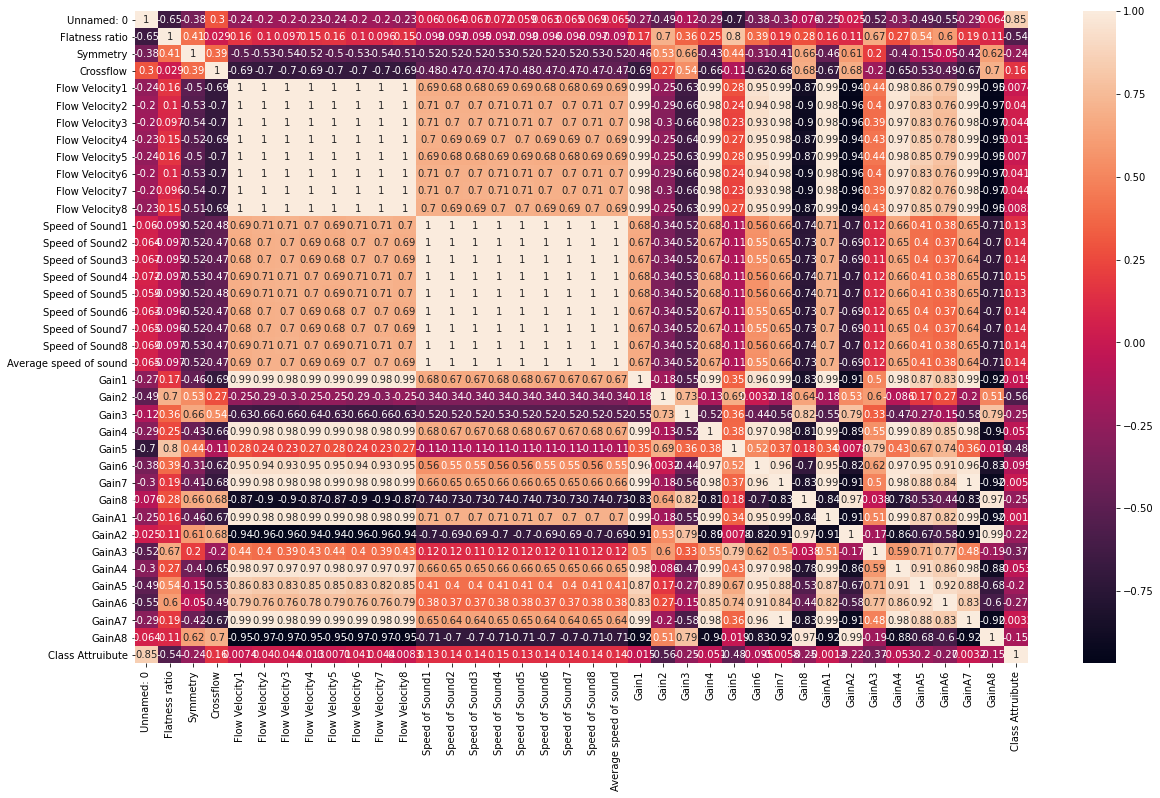

In [2]:
corrmatA = tableA.corr() # get correlation
plt.figure(figsize=(20,12)) 
sns.heatmap(corrmatA, annot=True)

<AxesSubplot:>

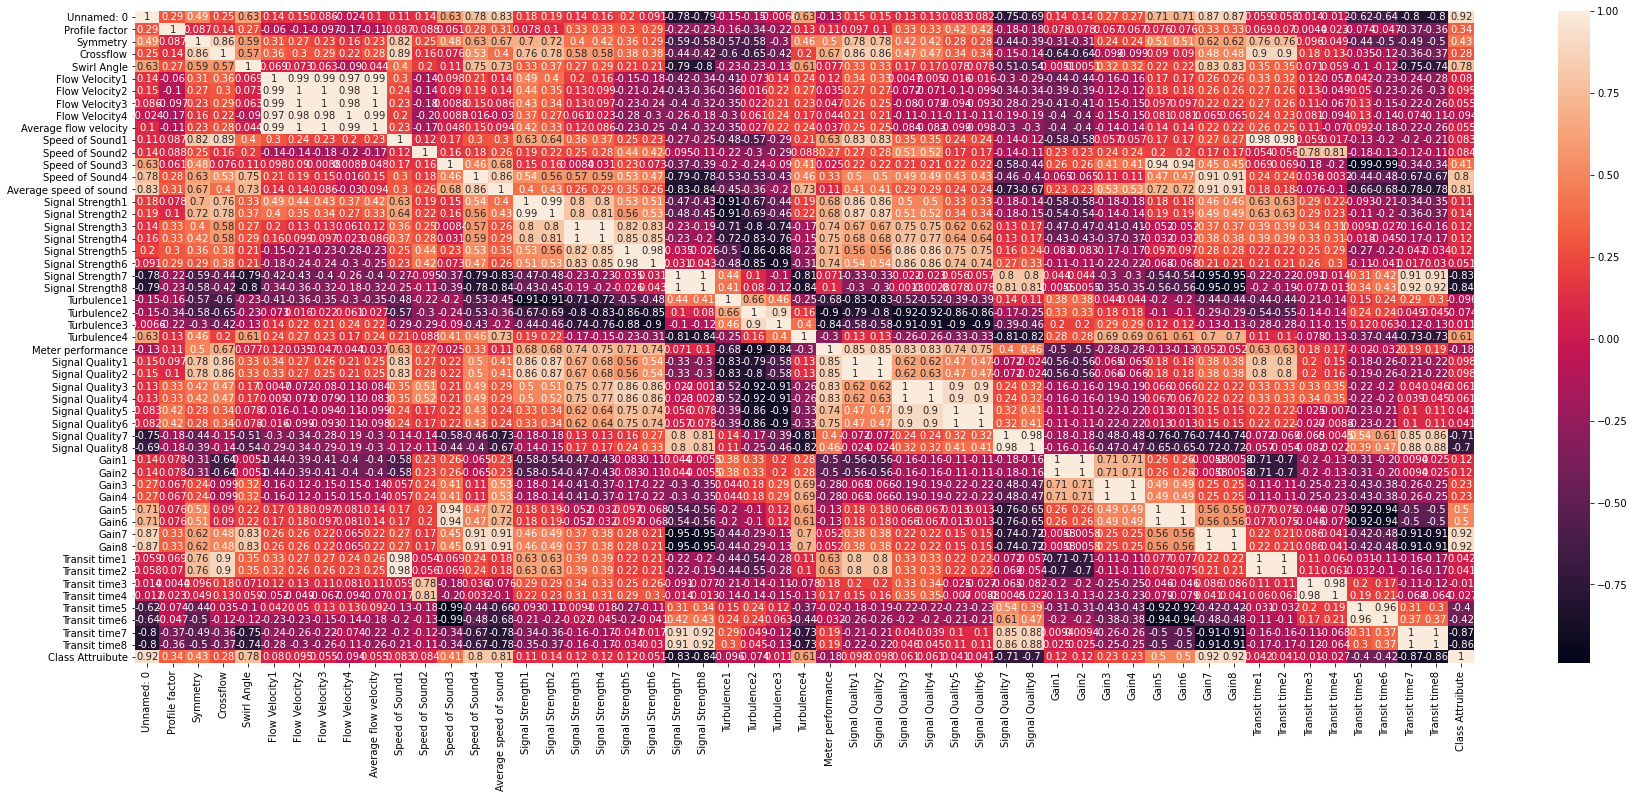

In [3]:
corrmatB = tableB.corr() # get correlation
plt.figure(figsize=(30,12)) 
sns.heatmap(corrmatB, annot=True)

<AxesSubplot:>

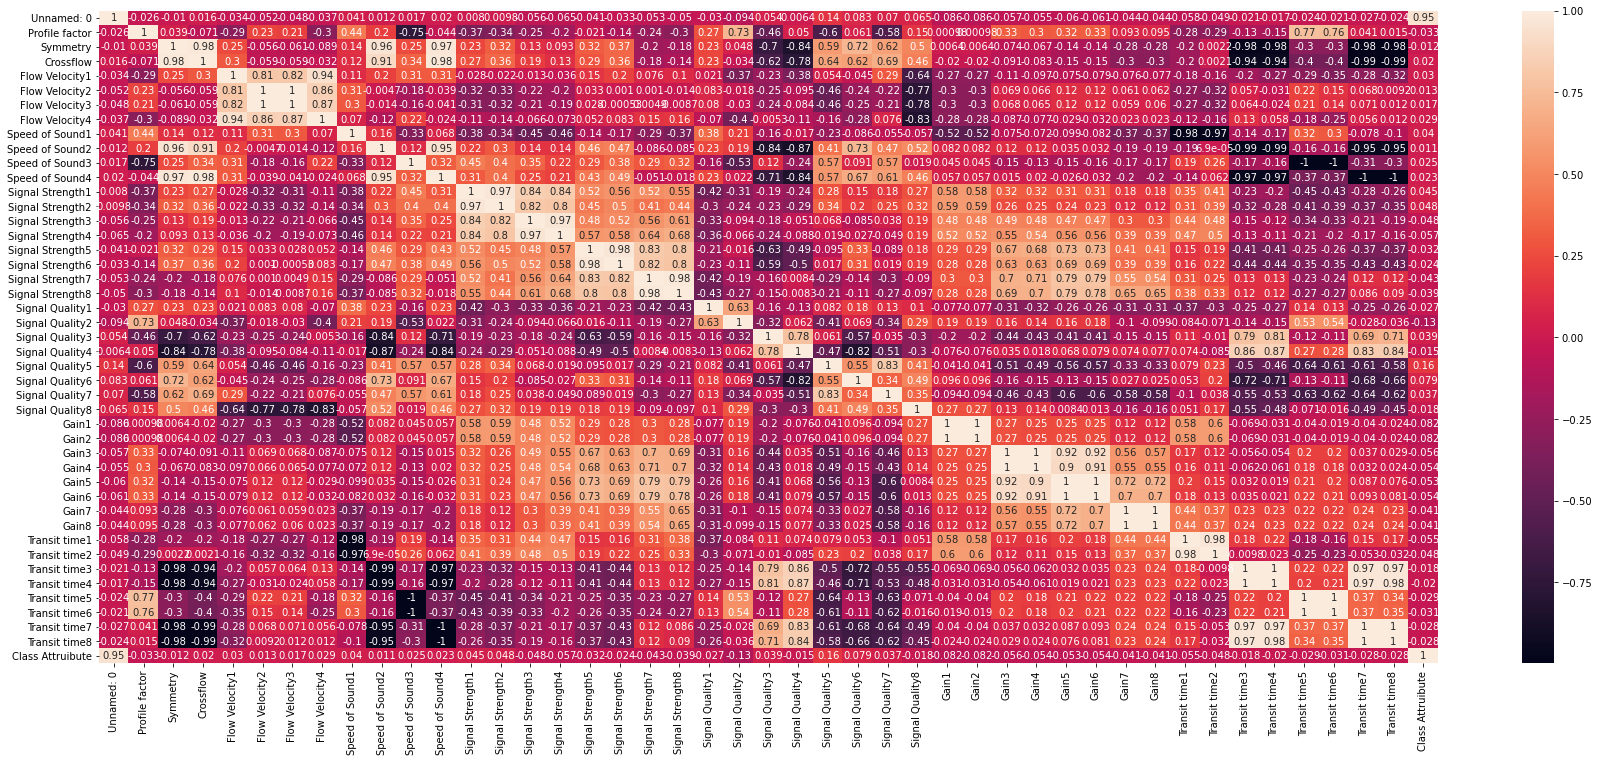

In [4]:
corrmatC = tableC.corr() # get correlation
plt.figure(figsize=(30,12)) 
sns.heatmap(corrmatC, annot=True)

**Dataset A Drop individual speed of sound column since average speed of sound column is already existed**

In [5]:
for i in range(8): # drop individual speed of sound column since average speed of sound column is already existed
    tableA.drop(f'Speed of Sound{i+1}', axis=1, inplace=True)
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows 

**Dataset A Get average flow velocity of eight paths for each row, drop each individual flow velocity column and append new column 'Average Flow Velocity'**

In [6]:
# get average flow velocity of eight paths for each row 
tableA["Average Flow Velocity"] = tableA.loc[:, ["Flow Velocity1","Flow Velocity2","Flow Velocity3","Flow Velocity4","Flow Velocity5","Flow Velocity6","Flow Velocity7","Flow Velocity8"]].mean(axis = 1)
for i in range(8): # drop individual flow velocity column
    tableA.drop(f'Flow Velocity{i+1}', axis=1, inplace=True)
column_to_move = tableA.pop("Average Flow Velocity")
tableA.insert(4, "Average Flow Velocity", column_to_move)
# drop 'Unnamed' column
tableA.drop(tableA.filter(regex="Unname"),axis=1, inplace=True)

**Dataset A Get average gain of eight paths for each row, drop each individual gain column and append new column 'Average Gain'**

In [7]:
# get average flow velocity of eight paths for each row 
tableA["Average Gain"] = tableA.loc[:, ["Gain1","Gain2","Gain3","Gain4","Gain5","Gain6","Gain7","Gain8","GainA1","GainA2","GainA3","GainA4","GainA5","GainA6","GainA7","GainA8"]].mean(axis = 1)
for i in range(8): # drop individual flow velocity column
    tableA.drop(f'Gain{i+1}', axis=1, inplace=True)
    tableA.drop(f'GainA{i+1}', axis=1, inplace=True)
column_to_move = tableA.pop("Average Gain")
tableA.insert(5, "Average Gain", column_to_move)
# write data to csv file 
tableA = tableA.reset_index(drop=True)
tableA.to_csv('MeterA_aggregation.csv', index = True)

**Dataset B Drop individual flow velocity and speed of sound column since average flow velocity column and average speed of sound column is already included **

In [8]:
for i in range(4): # drop individual flow velocity and speed of sound column since average flow velocity column and average speed of sound column is already included
    tableB.drop(f'Flow Velocity{i+1}', axis=1, inplace=True)
    tableB.drop(f'Speed of Sound{i+1}', axis=1, inplace=True)

**Dataset B Get average signal strength of four paths for each row, drop each individual flow velocity column and append new column 'Average Signal Strength'**

In [9]:
# get average signal strength of eight paths for each row 
tableB["Average Signal Strength"] = tableB.loc[:, ["Signal Strength1","Signal Strength2","Signal Strength3","Signal Strength4","Signal Strength5","Signal Strength6","Signal Strength7","Signal Strength8"]].mean(axis = 1)
for i in range(8): # drop individual flow velocity column
    tableB.drop(f'Signal Strength{i+1}', axis=1, inplace=True)
column_to_move = tableB.pop("Average Signal Strength")
tableB.insert(7, "Average Signal Strength", column_to_move)
# drop 'Unnamed' column
tableB.drop(tableB.filter(regex="Unname"),axis=1, inplace=True)
tableB

Profile factor  Symmetry  Crossflow  Swirl Angle  Average flow velocity  \
0         1.185089  1.028128   1.016478     0.150000               2.394439   
1         1.191806  1.033750   1.019411     0.217000               2.396089   
2         1.181983  1.028089   1.020994     0.088900               3.523517   
3         1.182761  1.028783   1.021072     0.117000               3.525933   
4         1.182272  1.028922   1.021350     0.022200               3.525128   
5         1.177961  1.030906   1.019450     0.016700               3.526094   
6         1.187083  1.029539   1.020756     0.217000               3.523839   
7         1.183139  1.030250   1.021972     0.206000               3.524917   
8         1.181678  1.031594   1.021439     0.189000               4.318294   
9         1.176644  1.025333   1.021261     0.038900               5.341794   
10        1.175167  1.030956   1.023589     0.038900               5.873867   
11        1.178217  1.026367   1.022672     0.150000               6.446511   
12        1.174122  1.031733   1.022856     0.072200               6.446133   
13        1.176083  1.025911   1.022261     0.100000               6.445472   
14        1.175839  1.029306   1.023956     0.088889               6.445606   
15        1.174028  1.029556   1.022828     0.083333               6.446583   
16        1.173206  1.029394   1.023178     0.044444               6.447083   
17        1.174878  1.029328   1.022739     0.061111               7.007811   
18        1.172383  1.033272   1.024778     0.022222               7.529367   
19        1.420239  0.961011   0.957406     1.290000               2.664839   
20        1.246800  0.960172   0.958061     0.760000               2.685889   
21        0.866283  0.577228   0.586494    -0.370000               2.757061   
22        1.456162  0.861194   0.852756     0.170000               5.524156   
23        1.237150  0.904428   0.903517    -0.060000               5.643294   
24        1.172067  1.025833   1.022111     0.010000               5.638733   
25        0.642938  0.839572   0.795061     0.640000               5.605200   
26        1.190828  1.020317   1.009039     0.230000               8.083911   
27        1.184406  1.023572   1.013950     0.140000               1.315461   
28        1.181928  1.032433   1.017606     0.040000               1.315033   
29        1.193094  1.010089   1.008489     0.310000               1.313922   
30        1.198183  1.009983   1.009344     0.370000               1.304022   
31        1.211367  1.016494   1.014528     0.540000               1.288856   
32        1.312211  0.972661   0.949900     0.480000               1.256283   
33        1.136839  0.940278   0.914678     1.540000               1.333389   
34        1.625278  0.544639   0.532600    -1.410000               1.386261   
35        1.279861  1.097539   1.090878     1.850000               7.441678   
36        1.287733  1.112750   1.104639     1.828000               6.888750   
37        1.291644  1.104600   1.096917     1.906000               6.355544   
38        1.282006  1.099078   1.089056     1.789000               6.368978   
39        1.280033  1.102956   1.094006     1.733000               6.363422   
40        1.279061  1.096306   1.087267     1.689000               6.371089   
41        1.276706  1.091683   1.086594     1.739000               6.368633   
42        1.292644  1.113844   1.102544     1.739000               6.365778   
43        1.296167  1.096772   1.089178     1.956000               3.432428   
44        1.292189  1.101433   1.091744     1.911000               3.435033   
45        1.283383  1.096878   1.087439     1.761000               3.435767   
46        1.315583  1.104456   1.099094     1.967000               3.432789   
47        1.280094  1.102083   1.088833     1.728000               3.438761   
48        1.291228  1.095356   1.086561     1.900000               3.438133   
49        1.307094  1.096578   1.090722     1.994000  

**Dataset B Get average turbulence of four paths for each row, drop each individual turbulence column and append new column 'Average Turbulence'**

In [10]:
# get average turbulence of eight paths for each row 
tableB["Average Turbulence"] = tableB.loc[:, ["Turbulence1","Turbulence2","Turbulence3","Turbulence4"]].mean(axis = 1)
for i in range(4): # drop individual turbulence column
    tableB.drop(f'Turbulence{i+1}', axis=1, inplace=True)
column_to_move = tableB.pop("Average Turbulence")
tableB.insert(8, "Average Turbulence", column_to_move)
tableB

Profile factor  Symmetry  Crossflow  Swirl Angle  Average flow velocity  \
0         1.185089  1.028128   1.016478     0.150000               2.394439   
1         1.191806  1.033750   1.019411     0.217000               2.396089   
2         1.181983  1.028089   1.020994     0.088900               3.523517   
3         1.182761  1.028783   1.021072     0.117000               3.525933   
4         1.182272  1.028922   1.021350     0.022200               3.525128   
5         1.177961  1.030906   1.019450     0.016700               3.526094   
6         1.187083  1.029539   1.020756     0.217000               3.523839   
7         1.183139  1.030250   1.021972     0.206000               3.524917   
8         1.181678  1.031594   1.021439     0.189000               4.318294   
9         1.176644  1.025333   1.021261     0.038900               5.341794   
10        1.175167  1.030956   1.023589     0.038900               5.873867   
11        1.178217  1.026367   1.022672     0.150000               6.446511   
12        1.174122  1.031733   1.022856     0.072200               6.446133   
13        1.176083  1.025911   1.022261     0.100000               6.445472   
14        1.175839  1.029306   1.023956     0.088889               6.445606   
15        1.174028  1.029556   1.022828     0.083333               6.446583   
16        1.173206  1.029394   1.023178     0.044444               6.447083   
17        1.174878  1.029328   1.022739     0.061111               7.007811   
18        1.172383  1.033272   1.024778     0.022222               7.529367   
19        1.420239  0.961011   0.957406     1.290000               2.664839   
20        1.246800  0.960172   0.958061     0.760000               2.685889   
21        0.866283  0.577228   0.586494    -0.370000               2.757061   
22        1.456162  0.861194   0.852756     0.170000               5.524156   
23        1.237150  0.904428   0.903517    -0.060000               5.643294   
24        1.172067  1.025833   1.022111     0.010000               5.638733   
25        0.642938  0.839572   0.795061     0.640000               5.605200   
26        1.190828  1.020317   1.009039     0.230000               8.083911   
27        1.184406  1.023572   1.013950     0.140000               1.315461   
28        1.181928  1.032433   1.017606     0.040000               1.315033   
29        1.193094  1.010089   1.008489     0.310000               1.313922   
30        1.198183  1.009983   1.009344     0.370000               1.304022   
31        1.211367  1.016494   1.014528     0.540000               1.288856   
32        1.312211  0.972661   0.949900     0.480000               1.256283   
33        1.136839  0.940278   0.914678     1.540000               1.333389   
34        1.625278  0.544639   0.532600    -1.410000               1.386261   
35        1.279861  1.097539   1.090878     1.850000               7.441678   
36        1.287733  1.112750   1.104639     1.828000               6.888750   
37        1.291644  1.104600   1.096917     1.906000               6.355544   
38        1.282006  1.099078   1.089056     1.789000               6.368978   
39        1.280033  1.102956   1.094006     1.733000               6.363422   
40        1.279061  1.096306   1.087267     1.689000               6.371089   
41        1.276706  1.091683   1.086594     1.739000               6.368633   
42        1.292644  1.113844   1.102544     1.739000               6.365778   
43        1.296167  1.096772   1.089178     1.956000               3.432428   
44        1.292189  1.101433   1.091744     1.911000               3.435033   
45        1.283383  1.096878   1.087439     1.761000               3.435767   
46        1.315583  1.104456   1.099094     1.967000               3.432789   
47        1.280094  1.102083   1.088833     1.728000               3.438761   
48        1.291228  1.095356   1.086561     1.900000               3.438133   
49        1.307094  1.096578   1.090722     1.994000  

**Dataset B Get average signal quality of four paths for each row, drop each individual signal quality column and append new column 'Average Signal Quality'**

In [11]:
# get average signal quality of eight paths for each row 
tableB["Average Signal Quality"] = tableB.loc[:, ["Signal Quality1","Signal Quality2","Signal Quality3","Signal Quality4","Signal Quality5","Signal Quality6","Signal Quality7","Signal Quality8"]].mean(axis = 1)
for i in range(8): # drop individual signal quality column
    tableB.drop(f'Signal Quality{i+1}', axis=1, inplace=True)
column_to_move = tableB.pop("Average Signal Quality")
tableB.insert(10, "Average Signal Quality", column_to_move)
# drop 'Unnamed' column
tableB.drop(tableB.filter(regex="Unname"),axis=1, inplace=True)
tableB

Profile factor  Symmetry  Crossflow  Swirl Angle  Average flow velocity  \
0         1.185089  1.028128   1.016478     0.150000               2.394439   
1         1.191806  1.033750   1.019411     0.217000               2.396089   
2         1.181983  1.028089   1.020994     0.088900               3.523517   
3         1.182761  1.028783   1.021072     0.117000               3.525933   
4         1.182272  1.028922   1.021350     0.022200               3.525128   
5         1.177961  1.030906   1.019450     0.016700               3.526094   
6         1.187083  1.029539   1.020756     0.217000               3.523839   
7         1.183139  1.030250   1.021972     0.206000               3.524917   
8         1.181678  1.031594   1.021439     0.189000               4.318294   
9         1.176644  1.025333   1.021261     0.038900               5.341794   
10        1.175167  1.030956   1.023589     0.038900               5.873867   
11        1.178217  1.026367   1.022672     0.150000               6.446511   
12        1.174122  1.031733   1.022856     0.072200               6.446133   
13        1.176083  1.025911   1.022261     0.100000               6.445472   
14        1.175839  1.029306   1.023956     0.088889               6.445606   
15        1.174028  1.029556   1.022828     0.083333               6.446583   
16        1.173206  1.029394   1.023178     0.044444               6.447083   
17        1.174878  1.029328   1.022739     0.061111               7.007811   
18        1.172383  1.033272   1.024778     0.022222               7.529367   
19        1.420239  0.961011   0.957406     1.290000               2.664839   
20        1.246800  0.960172   0.958061     0.760000               2.685889   
21        0.866283  0.577228   0.586494    -0.370000               2.757061   
22        1.456162  0.861194   0.852756     0.170000               5.524156   
23        1.237150  0.904428   0.903517    -0.060000               5.643294   
24        1.172067  1.025833   1.022111     0.010000               5.638733   
25        0.642938  0.839572   0.795061     0.640000               5.605200   
26        1.190828  1.020317   1.009039     0.230000               8.083911   
27        1.184406  1.023572   1.013950     0.140000               1.315461   
28        1.181928  1.032433   1.017606     0.040000               1.315033   
29        1.193094  1.010089   1.008489     0.310000               1.313922   
30        1.198183  1.009983   1.009344     0.370000               1.304022   
31        1.211367  1.016494   1.014528     0.540000               1.288856   
32        1.312211  0.972661   0.949900     0.480000               1.256283   
33        1.136839  0.940278   0.914678     1.540000               1.333389   
34        1.625278  0.544639   0.532600    -1.410000               1.386261   
35        1.279861  1.097539   1.090878     1.850000               7.441678   
36        1.287733  1.112750   1.104639     1.828000               6.888750   
37        1.291644  1.104600   1.096917     1.906000               6.355544   
38        1.282006  1.099078   1.089056     1.789000               6.368978   
39        1.280033  1.102956   1.094006     1.733000               6.363422   
40        1.279061  1.096306   1.087267     1.689000               6.371089   
41        1.276706  1.091683   1.086594     1.739000               6.368633   
42        1.292644  1.113844   1.102544     1.739000               6.365778   
43        1.296167  1.096772   1.089178     1.956000               3.432428   
44        1.292189  1.101433   1.091744     1.911000               3.435033   
45        1.283383  1.096878   1.087439     1.761000               3.435767   
46        1.315583  1.104456   1.099094     1.967000               3.432789   
47        1.280094  1.102083   1.088833     1.728000               3.438761   
48        1.291228  1.095356   1.086561     1.900000               3.438133   
49        1.307094  1.096578   1.090722     1.994000  

**Dataset B Get average gain of four paths for each row, drop each individual gain column and append new column 'Average Gain'**

In [12]:
# get average gain of eight paths for each row 
tableB["Average Gain"] = tableB.loc[:, ["Gain1","Gain2","Gain3","Gain4","Gain5","Gain6","Gain7","Gain8"]].mean(axis = 1)
for i in range(8): # drop individual gain column
    tableB.drop(f'Gain{i+1}', axis=1, inplace=True)
column_to_move = tableB.pop("Average Gain")
tableB.insert(10, "Average Gain", column_to_move)
# drop 'Unnamed' column
tableB.drop(tableB.filter(regex="Unname"),axis=1, inplace=True)
tableB

Profile factor  Symmetry  Crossflow  Swirl Angle  Average flow velocity  \
0         1.185089  1.028128   1.016478     0.150000               2.394439   
1         1.191806  1.033750   1.019411     0.217000               2.396089   
2         1.181983  1.028089   1.020994     0.088900               3.523517   
3         1.182761  1.028783   1.021072     0.117000               3.525933   
4         1.182272  1.028922   1.021350     0.022200               3.525128   
5         1.177961  1.030906   1.019450     0.016700               3.526094   
6         1.187083  1.029539   1.020756     0.217000               3.523839   
7         1.183139  1.030250   1.021972     0.206000               3.524917   
8         1.181678  1.031594   1.021439     0.189000               4.318294   
9         1.176644  1.025333   1.021261     0.038900               5.341794   
10        1.175167  1.030956   1.023589     0.038900               5.873867   
11        1.178217  1.026367   1.022672     0.150000               6.446511   
12        1.174122  1.031733   1.022856     0.072200               6.446133   
13        1.176083  1.025911   1.022261     0.100000               6.445472   
14        1.175839  1.029306   1.023956     0.088889               6.445606   
15        1.174028  1.029556   1.022828     0.083333               6.446583   
16        1.173206  1.029394   1.023178     0.044444               6.447083   
17        1.174878  1.029328   1.022739     0.061111               7.007811   
18        1.172383  1.033272   1.024778     0.022222               7.529367   
19        1.420239  0.961011   0.957406     1.290000               2.664839   
20        1.246800  0.960172   0.958061     0.760000               2.685889   
21        0.866283  0.577228   0.586494    -0.370000               2.757061   
22        1.456162  0.861194   0.852756     0.170000               5.524156   
23        1.237150  0.904428   0.903517    -0.060000               5.643294   
24        1.172067  1.025833   1.022111     0.010000               5.638733   
25        0.642938  0.839572   0.795061     0.640000               5.605200   
26        1.190828  1.020317   1.009039     0.230000               8.083911   
27        1.184406  1.023572   1.013950     0.140000               1.315461   
28        1.181928  1.032433   1.017606     0.040000               1.315033   
29        1.193094  1.010089   1.008489     0.310000               1.313922   
30        1.198183  1.009983   1.009344     0.370000               1.304022   
31        1.211367  1.016494   1.014528     0.540000               1.288856   
32        1.312211  0.972661   0.949900     0.480000               1.256283   
33        1.136839  0.940278   0.914678     1.540000               1.333389   
34        1.625278  0.544639   0.532600    -1.410000               1.386261   
35        1.279861  1.097539   1.090878     1.850000               7.441678   
36        1.287733  1.112750   1.104639     1.828000               6.888750   
37        1.291644  1.104600   1.096917     1.906000               6.355544   
38        1.282006  1.099078   1.089056     1.789000               6.368978   
39        1.280033  1.102956   1.094006     1.733000               6.363422   
40        1.279061  1.096306   1.087267     1.689000               6.371089   
41        1.276706  1.091683   1.086594     1.739000               6.368633   
42        1.292644  1.113844   1.102544     1.739000               6.365778   
43        1.296167  1.096772   1.089178     1.956000               3.432428   
44        1.292189  1.101433   1.091744     1.911000               3.435033   
45        1.283383  1.096878   1.087439     1.761000               3.435767   
46        1.315583  1.104456   1.099094     1.967000               3.432789   
47        1.280094  1.102083   1.088833     1.728000               3.438761   
48        1.291228  1.095356   1.086561     1.900000               3.438133   
49        1.307094  1.096578   1.090722     1.994000  

**Dataset B Get average transit time of four paths for each row, drop each individual transit time column and append new column 'Average Transit Time'**

In [13]:
# get average transit time of eight paths for each row 
tableB["Average Transit Time"] = tableB.loc[:, ["Transit time1","Transit time2","Transit time3","Transit time4","Transit time5","Transit time6","Transit time7","Transit time8"]].mean(axis = 1)
for i in range(8): # drop individual transit time column
    tableB.drop(f'Transit time{i+1}', axis=1, inplace=True)
column_to_move = tableB.pop("Average Transit Time")
tableB.insert(11, "Average Transit Time", column_to_move)
# drop 'Unnamed' column
tableB.drop(tableB.filter(regex="Unname"),axis=1, inplace=True)
tableB

Profile factor  Symmetry  Crossflow  Swirl Angle  Average flow velocity  \
0         1.185089  1.028128   1.016478     0.150000               2.394439   
1         1.191806  1.033750   1.019411     0.217000               2.396089   
2         1.181983  1.028089   1.020994     0.088900               3.523517   
3         1.182761  1.028783   1.021072     0.117000               3.525933   
4         1.182272  1.028922   1.021350     0.022200               3.525128   
5         1.177961  1.030906   1.019450     0.016700               3.526094   
6         1.187083  1.029539   1.020756     0.217000               3.523839   
7         1.183139  1.030250   1.021972     0.206000               3.524917   
8         1.181678  1.031594   1.021439     0.189000               4.318294   
9         1.176644  1.025333   1.021261     0.038900               5.341794   
10        1.175167  1.030956   1.023589     0.038900               5.873867   
11        1.178217  1.026367   1.022672     0.150000               6.446511   
12        1.174122  1.031733   1.022856     0.072200               6.446133   
13        1.176083  1.025911   1.022261     0.100000               6.445472   
14        1.175839  1.029306   1.023956     0.088889               6.445606   
15        1.174028  1.029556   1.022828     0.083333               6.446583   
16        1.173206  1.029394   1.023178     0.044444               6.447083   
17        1.174878  1.029328   1.022739     0.061111               7.007811   
18        1.172383  1.033272   1.024778     0.022222               7.529367   
19        1.420239  0.961011   0.957406     1.290000               2.664839   
20        1.246800  0.960172   0.958061     0.760000               2.685889   
21        0.866283  0.577228   0.586494    -0.370000               2.757061   
22        1.456162  0.861194   0.852756     0.170000               5.524156   
23        1.237150  0.904428   0.903517    -0.060000               5.643294   
24        1.172067  1.025833   1.022111     0.010000               5.638733   
25        0.642938  0.839572   0.795061     0.640000               5.605200   
26        1.190828  1.020317   1.009039     0.230000               8.083911   
27        1.184406  1.023572   1.013950     0.140000               1.315461   
28        1.181928  1.032433   1.017606     0.040000               1.315033   
29        1.193094  1.010089   1.008489     0.310000               1.313922   
30        1.198183  1.009983   1.009344     0.370000               1.304022   
31        1.211367  1.016494   1.014528     0.540000               1.288856   
32        1.312211  0.972661   0.949900     0.480000               1.256283   
33        1.136839  0.940278   0.914678     1.540000               1.333389   
34        1.625278  0.544639   0.532600    -1.410000               1.386261   
35        1.279861  1.097539   1.090878     1.850000               7.441678   
36        1.287733  1.112750   1.104639     1.828000               6.888750   
37        1.291644  1.104600   1.096917     1.906000               6.355544   
38        1.282006  1.099078   1.089056     1.789000               6.368978   
39        1.280033  1.102956   1.094006     1.733000               6.363422   
40        1.279061  1.096306   1.087267     1.689000               6.371089   
41        1.276706  1.091683   1.086594     1.739000               6.368633   
42        1.292644  1.113844   1.102544     1.739000               6.365778   
43        1.296167  1.096772   1.089178     1.956000               3.432428   
44        1.292189  1.101433   1.091744     1.911000               3.435033   
45        1.283383  1.096878   1.087439     1.761000               3.435767   
46        1.315583  1.104456   1.099094     1.967000               3.432789   
47        1.280094  1.102083   1.088833     1.728000               3.438761   
48        1.291228  1.095356   1.086561     1.900000               3.438133   
49        1.307094  1.096578   1.090722     1.994000  

**Write data back to csv file**

In [14]:
# write data to csv file 
tableB= tableB.reset_index(drop=True)
tableB.to_csv('MeterB_aggregation.csv', index = True)

**Dataset C Get average flow velocity of four paths for each row drop each individual flow velocity column and append new column 'Average Flow Velocity'**

In [15]:
# get average flow velocity of eight paths for each row 
tableC["Average Flow Velocity"] = tableC.loc[:, ["Flow Velocity1","Flow Velocity2","Flow Velocity3","Flow Velocity4"]].mean(axis = 1)
for i in range(4): # drop individual flow velocity column
    tableC.drop(f'Flow Velocity{i+1}', axis=1, inplace=True)
column_to_move = tableC.pop("Average Flow Velocity")
tableC.insert(4, "Average Flow Velocity", column_to_move)
# drop 'Unnamed' column
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableC

Profile factor  Symmetry  Crossflow  Average Flow Velocity  \
0          1.102690  1.004425   1.006741              15.917361   
1          1.101432  1.003722   1.008256              14.729722   
2          1.098568  1.002528   1.009103              14.743750   
3          1.099516  1.007024   1.009363              14.724167   
4          1.100336  1.000661   1.006709              14.705417   
5          1.102270  1.002827   1.006621              14.710486   
6          1.101425  1.003775   1.008887              14.709097   
7          1.101348  1.001413   1.007861              13.373472   
8          1.104456  1.000182   1.007576              12.219583   
9          1.103606  1.006327   1.008536               9.755764   
10         1.107153  1.003215   1.009676               7.961528   
11         1.099542  1.006948   1.010854               7.963681   
12         1.103924  1.007029   1.018002               7.971389   
13         1.104128  1.006447   1.011297               7.974792   
14         1.104769  1.004227   1.007382               7.968889   
15         1.103179  1.002514   1.010304               7.966667   
16         1.108786  1.005196   1.009322               5.493681   
17         1.103441  1.002953   1.008952              17.096597   
18         1.099435  1.001813   1.008346              17.178333   
19         1.102045  1.006816   1.011069              15.947222   
20         1.099249  1.005730   1.007531              14.754514   
21         1.101185  1.004524   1.009315              14.769722   
22         1.098245  1.004159   1.008298              14.789861   
23         1.105123  1.005484   1.008706              14.756181   
24         1.100455  1.007077   1.009638              14.770139   
25         1.100628  1.007308   1.014737              14.782292   
26         1.098991  1.002920   1.009097              13.480625   
27         1.102085  1.002870   1.011389              12.117500   
28         1.102514  1.004298   1.010866               9.844583   
29         1.097258  1.004946   1.009309               8.078958   
30         1.105553  1.007924   1.010881               8.059444   
31         1.100816  1.006934   1.009013               8.080556   
32         1.102139  1.002601   1.007858               8.073819   
33         1.105654  1.004057   1.008286               8.061875   
34         1.100202  1.006269   1.010191               8.067986   
35         1.100611  1.004254   1.006614               5.561806   
36         1.104674  1.011236   1.010186               5.618750   
37         1.101033  1.001290   1.005258               7.866181   
38         1.088863  1.007341   1.010478               7.861667   
39         1.097343  1.004059   1.009724               7.850764   
40         1.094180  1.007860   1.008288               7.858264   
41         1.096063  1.006034   1.009637               7.849028   
42         1.092792  1.002728   1.005820               7.849861   
43         1.093502  1.002840   1.005517               9.795556   
44         1.094275  1.001117   1.008665              12.315208   
45         1.096696  1.004938   1.007012              13.476806   
46         1.093591  1.004534   1.006319              14.706458   
47         1.100235  1.000712   1.001148              14.645347   
48         1.095746  1.004781   1.008033              14.616667   
49         1.095075  1.002658   1.009200              14.650833   
50         1.094428  1.000000   1.005284              14.654306   
51         1.092925  1.001677   1.006181              14.672569   
52         1.093832  0.999032   1.000829              15.916319   
53         1.096903  1.001893   1.005722              17.258681   
54         1.076365  1.014104   1.015355               6.535069   
55         1.089422  1.007042   1.013247               6.511597   
56         1.077056  1.016599   1.021997               6.504792   
57         1.158293  0.959481   0.963525               6.276736   
58         1.101470  1.009877   1.011368            

**Dataset C Get average speed of sound of four paths for each row drop each individual speed of sound column and append new column 'Average Speed of Sound'**

In [16]:
# get average speed of sound of eight paths for each row 
tableC["Average Speed of Sound"] = tableC.loc[:, ["Speed of Sound1","Speed of Sound2","Speed of Sound3","Speed of Sound4"]].mean(axis = 1)
for i in range(4): # drop individual speed of sound column
    tableC.drop(f'Speed of Sound{i+1}', axis=1, inplace=True)
column_to_move = tableC.pop("Average Speed of Sound")
tableC.insert(4, "Average Speed of Sound", column_to_move)
# drop 'Unnamed' column
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableC

Profile factor  Symmetry  Crossflow  Average Flow Velocity  \
0          1.102690  1.004425   1.006741              15.917361   
1          1.101432  1.003722   1.008256              14.729722   
2          1.098568  1.002528   1.009103              14.743750   
3          1.099516  1.007024   1.009363              14.724167   
4          1.100336  1.000661   1.006709              14.705417   
5          1.102270  1.002827   1.006621              14.710486   
6          1.101425  1.003775   1.008887              14.709097   
7          1.101348  1.001413   1.007861              13.373472   
8          1.104456  1.000182   1.007576              12.219583   
9          1.103606  1.006327   1.008536               9.755764   
10         1.107153  1.003215   1.009676               7.961528   
11         1.099542  1.006948   1.010854               7.963681   
12         1.103924  1.007029   1.018002               7.971389   
13         1.104128  1.006447   1.011297               7.974792   
14         1.104769  1.004227   1.007382               7.968889   
15         1.103179  1.002514   1.010304               7.966667   
16         1.108786  1.005196   1.009322               5.493681   
17         1.103441  1.002953   1.008952              17.096597   
18         1.099435  1.001813   1.008346              17.178333   
19         1.102045  1.006816   1.011069              15.947222   
20         1.099249  1.005730   1.007531              14.754514   
21         1.101185  1.004524   1.009315              14.769722   
22         1.098245  1.004159   1.008298              14.789861   
23         1.105123  1.005484   1.008706              14.756181   
24         1.100455  1.007077   1.009638              14.770139   
25         1.100628  1.007308   1.014737              14.782292   
26         1.098991  1.002920   1.009097              13.480625   
27         1.102085  1.002870   1.011389              12.117500   
28         1.102514  1.004298   1.010866               9.844583   
29         1.097258  1.004946   1.009309               8.078958   
30         1.105553  1.007924   1.010881               8.059444   
31         1.100816  1.006934   1.009013               8.080556   
32         1.102139  1.002601   1.007858               8.073819   
33         1.105654  1.004057   1.008286               8.061875   
34         1.100202  1.006269   1.010191               8.067986   
35         1.100611  1.004254   1.006614               5.561806   
36         1.104674  1.011236   1.010186               5.618750   
37         1.101033  1.001290   1.005258               7.866181   
38         1.088863  1.007341   1.010478               7.861667   
39         1.097343  1.004059   1.009724               7.850764   
40         1.094180  1.007860   1.008288               7.858264   
41         1.096063  1.006034   1.009637               7.849028   
42         1.092792  1.002728   1.005820               7.849861   
43         1.093502  1.002840   1.005517               9.795556   
44         1.094275  1.001117   1.008665              12.315208   
45         1.096696  1.004938   1.007012              13.476806   
46         1.093591  1.004534   1.006319              14.706458   
47         1.100235  1.000712   1.001148              14.645347   
48         1.095746  1.004781   1.008033              14.616667   
49         1.095075  1.002658   1.009200              14.650833   
50         1.094428  1.000000   1.005284              14.654306   
51         1.092925  1.001677   1.006181              14.672569   
52         1.093832  0.999032   1.000829              15.916319   
53         1.096903  1.001893   1.005722              17.258681   
54         1.076365  1.014104   1.015355               6.535069   
55         1.089422  1.007042   1.013247               6.511597   
56         1.077056  1.016599   1.021997               6.504792   
57         1.158293  0.959481   0.963525               6.276736   
58         1.101470  1.009877   1.011368            

**Dataset C Get average signal quality of four paths for each row drop each individual signal quality column and append new column 'Average Signal Quality'**

In [17]:
# get average signal strength of eight paths for each row 
tableC["Average Signal Strength"] = tableC.loc[:, ["Signal Strength1","Signal Strength2","Signal Strength3","Signal Strength4","Signal Strength5","Signal Strength6","Signal Strength7","Signal Strength8"]].mean(axis = 1)
for i in range(8): # drop individual signal strength column
    tableC.drop(f'Signal Strength{i+1}', axis=1, inplace=True)
column_to_move = tableC.pop("Average Signal Strength")
tableC.insert(4, "Average Signal Strength", column_to_move)
# drop 'Unnamed' column
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableC

Profile factor  Symmetry  Crossflow  Average Flow Velocity  \
0          1.102690  1.004425   1.006741              15.917361   
1          1.101432  1.003722   1.008256              14.729722   
2          1.098568  1.002528   1.009103              14.743750   
3          1.099516  1.007024   1.009363              14.724167   
4          1.100336  1.000661   1.006709              14.705417   
5          1.102270  1.002827   1.006621              14.710486   
6          1.101425  1.003775   1.008887              14.709097   
7          1.101348  1.001413   1.007861              13.373472   
8          1.104456  1.000182   1.007576              12.219583   
9          1.103606  1.006327   1.008536               9.755764   
10         1.107153  1.003215   1.009676               7.961528   
11         1.099542  1.006948   1.010854               7.963681   
12         1.103924  1.007029   1.018002               7.971389   
13         1.104128  1.006447   1.011297               7.974792   
14         1.104769  1.004227   1.007382               7.968889   
15         1.103179  1.002514   1.010304               7.966667   
16         1.108786  1.005196   1.009322               5.493681   
17         1.103441  1.002953   1.008952              17.096597   
18         1.099435  1.001813   1.008346              17.178333   
19         1.102045  1.006816   1.011069              15.947222   
20         1.099249  1.005730   1.007531              14.754514   
21         1.101185  1.004524   1.009315              14.769722   
22         1.098245  1.004159   1.008298              14.789861   
23         1.105123  1.005484   1.008706              14.756181   
24         1.100455  1.007077   1.009638              14.770139   
25         1.100628  1.007308   1.014737              14.782292   
26         1.098991  1.002920   1.009097              13.480625   
27         1.102085  1.002870   1.011389              12.117500   
28         1.102514  1.004298   1.010866               9.844583   
29         1.097258  1.004946   1.009309               8.078958   
30         1.105553  1.007924   1.010881               8.059444   
31         1.100816  1.006934   1.009013               8.080556   
32         1.102139  1.002601   1.007858               8.073819   
33         1.105654  1.004057   1.008286               8.061875   
34         1.100202  1.006269   1.010191               8.067986   
35         1.100611  1.004254   1.006614               5.561806   
36         1.104674  1.011236   1.010186               5.618750   
37         1.101033  1.001290   1.005258               7.866181   
38         1.088863  1.007341   1.010478               7.861667   
39         1.097343  1.004059   1.009724               7.850764   
40         1.094180  1.007860   1.008288               7.858264   
41         1.096063  1.006034   1.009637               7.849028   
42         1.092792  1.002728   1.005820               7.849861   
43         1.093502  1.002840   1.005517               9.795556   
44         1.094275  1.001117   1.008665              12.315208   
45         1.096696  1.004938   1.007012              13.476806   
46         1.093591  1.004534   1.006319              14.706458   
47         1.100235  1.000712   1.001148              14.645347   
48         1.095746  1.004781   1.008033              14.616667   
49         1.095075  1.002658   1.009200              14.650833   
50         1.094428  1.000000   1.005284              14.654306   
51         1.092925  1.001677   1.006181              14.672569   
52         1.093832  0.999032   1.000829              15.916319   
53         1.096903  1.001893   1.005722              17.258681   
54         1.076365  1.014104   1.015355               6.535069   
55         1.089422  1.007042   1.013247               6.511597   
56         1.077056  1.016599   1.021997               6.504792   
57         1.158293  0.959481   0.963525               6.276736   
58         1.101470  1.009877   1.011368            

**Dataset C Get average signal quality of four paths for each row drop each individual signal quality column and append new column 'Average Signal Quality'**

In [18]:
# get average signal quality of eight paths for each row 
tableC["Average Signal Quality"] = tableC.loc[:, ["Signal Quality1","Signal Quality2","Signal Quality3","Signal Quality4","Signal Quality5","Signal Quality6","Signal Quality7","Signal Quality8"]].mean(axis = 1)
for i in range(8): # drop individual signal quality of sound column
    tableC.drop(f'Signal Quality{i+1}', axis=1, inplace=True)
column_to_move = tableC.pop("Average Signal Quality")
tableC.insert(4, "Average Signal Quality", column_to_move)
# drop 'Unnamed' column
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableC

Profile factor  Symmetry  Crossflow  Average Flow Velocity  \
0          1.102690  1.004425   1.006741              15.917361   
1          1.101432  1.003722   1.008256              14.729722   
2          1.098568  1.002528   1.009103              14.743750   
3          1.099516  1.007024   1.009363              14.724167   
4          1.100336  1.000661   1.006709              14.705417   
5          1.102270  1.002827   1.006621              14.710486   
6          1.101425  1.003775   1.008887              14.709097   
7          1.101348  1.001413   1.007861              13.373472   
8          1.104456  1.000182   1.007576              12.219583   
9          1.103606  1.006327   1.008536               9.755764   
10         1.107153  1.003215   1.009676               7.961528   
11         1.099542  1.006948   1.010854               7.963681   
12         1.103924  1.007029   1.018002               7.971389   
13         1.104128  1.006447   1.011297               7.974792   
14         1.104769  1.004227   1.007382               7.968889   
15         1.103179  1.002514   1.010304               7.966667   
16         1.108786  1.005196   1.009322               5.493681   
17         1.103441  1.002953   1.008952              17.096597   
18         1.099435  1.001813   1.008346              17.178333   
19         1.102045  1.006816   1.011069              15.947222   
20         1.099249  1.005730   1.007531              14.754514   
21         1.101185  1.004524   1.009315              14.769722   
22         1.098245  1.004159   1.008298              14.789861   
23         1.105123  1.005484   1.008706              14.756181   
24         1.100455  1.007077   1.009638              14.770139   
25         1.100628  1.007308   1.014737              14.782292   
26         1.098991  1.002920   1.009097              13.480625   
27         1.102085  1.002870   1.011389              12.117500   
28         1.102514  1.004298   1.010866               9.844583   
29         1.097258  1.004946   1.009309               8.078958   
30         1.105553  1.007924   1.010881               8.059444   
31         1.100816  1.006934   1.009013               8.080556   
32         1.102139  1.002601   1.007858               8.073819   
33         1.105654  1.004057   1.008286               8.061875   
34         1.100202  1.006269   1.010191               8.067986   
35         1.100611  1.004254   1.006614               5.561806   
36         1.104674  1.011236   1.010186               5.618750   
37         1.101033  1.001290   1.005258               7.866181   
38         1.088863  1.007341   1.010478               7.861667   
39         1.097343  1.004059   1.009724               7.850764   
40         1.094180  1.007860   1.008288               7.858264   
41         1.096063  1.006034   1.009637               7.849028   
42         1.092792  1.002728   1.005820               7.849861   
43         1.093502  1.002840   1.005517               9.795556   
44         1.094275  1.001117   1.008665              12.315208   
45         1.096696  1.004938   1.007012              13.476806   
46         1.093591  1.004534   1.006319              14.706458   
47         1.100235  1.000712   1.001148              14.645347   
48         1.095746  1.004781   1.008033              14.616667   
49         1.095075  1.002658   1.009200              14.650833   
50         1.094428  1.000000   1.005284              14.654306   
51         1.092925  1.001677   1.006181              14.672569   
52         1.093832  0.999032   1.000829              15.916319   
53         1.096903  1.001893   1.005722              17.258681   
54         1.076365  1.014104   1.015355               6.535069   
55         1.089422  1.007042   1.013247               6.511597   
56         1.077056  1.016599   1.021997               6.504792   
57         1.158293  0.959481   0.963525               6.276736   
58         1.101470  1.009877   1.011368            

**Dataset C Get average gain of four paths for each row drop each individual gain column and append new column 'Average Gain'**

In [19]:
# get average gain of eight paths for each row 
tableC["Average Gain"] = tableC.loc[:, ["Gain1","Gain2","Gain3","Gain4","Gain5","Gain6","Gain7","Gain8"]].mean(axis = 1)
for i in range(8): # drop individual gain of sound column
    tableC.drop(f'Gain{i+1}', axis=1, inplace=True)
column_to_move = tableC.pop("Average Gain")
tableC.insert(4, "Average Gain", column_to_move)
# drop 'Unnamed' column
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableC

Profile factor  Symmetry  Crossflow  Average Flow Velocity  Average Gain  \
0          1.102690  1.004425   1.006741              15.917361     15.109722   
1          1.101432  1.003722   1.008256              14.729722     15.100000   
2          1.098568  1.002528   1.009103              14.743750     15.100000   
3          1.099516  1.007024   1.009363              14.724167     15.100000   
4          1.100336  1.000661   1.006709              14.705417     15.100000   
5          1.102270  1.002827   1.006621              14.710486     15.100000   
6          1.101425  1.003775   1.008887              14.709097     15.100000   
7          1.101348  1.001413   1.007861              13.373472     15.100000   
8          1.104456  1.000182   1.007576              12.219583     15.100000   
9          1.103606  1.006327   1.008536               9.755764     15.100000   
10         1.107153  1.003215   1.009676               7.961528     15.100000   
11         1.099542  1.006948   1.010854               7.963681     15.100000   
12         1.103924  1.007029   1.018002               7.971389     15.100000   
13         1.104128  1.006447   1.011297               7.974792     15.100000   
14         1.104769  1.004227   1.007382               7.968889     15.100000   
15         1.103179  1.002514   1.010304               7.966667     15.082639   
16         1.108786  1.005196   1.009322               5.493681     14.975000   
17         1.103441  1.002953   1.008952              17.096597     15.296528   
18         1.099435  1.001813   1.008346              17.178333     15.556597   
19         1.102045  1.006816   1.011069              15.947222     15.275000   
20         1.099249  1.005730   1.007531              14.754514     15.275000   
21         1.101185  1.004524   1.009315              14.769722     15.275000   
22         1.098245  1.004159   1.008298              14.789861     15.275000   
23         1.105123  1.005484   1.008706              14.756181     15.275000   
24         1.100455  1.007077   1.009638              14.770139     15.275000   
25         1.100628  1.007308   1.014737              14.782292     15.275000   
26         1.098991  1.002920   1.009097              13.480625     15.275000   
27         1.102085  1.002870   1.011389              12.117500     15.275000   
28         1.102514  1.004298   1.010866               9.844583     15.275000   
29         1.097258  1.004946   1.009309               8.078958     15.275000   
30         1.105553  1.007924   1.010881               8.059444     15.275000   
31         1.100816  1.006934   1.009013               8.080556     15.275000   
32         1.102139  1.002601   1.007858               8.073819     15.275000   
33         1.105654  1.004057   1.008286               8.061875     15.275000   
34         1.100202  1.006269   1.010191               8.067986     15.275000   
35         1.100611  1.004254   1.006614               5.561806     15.275000   
36         1.104674  1.011236   1.010186               5.618750     15.525000   
37         1.101033  1.001290   1.005258               7.866181     15.525000   
38         1.088863  1.007341   1.010478               7.861667     15.525000   
39         1.097343  1.004059   1.009724               7.850764     15.525000   
40         1.094180  1.007860   1.008288               7.858264     15.525000   
41         1.096063  1.006034   1.009637               7.849028     15.525000   
42         1.092792  1.002728   1.005820               7.849861     15.525000   
43         1.093502  1.002840   1.005517               9.795556     15.425000   
44         1.094275  1.001117   1.008665              12.315208     15.425000   
45         1.096696  1.004938   1.007012              13.476806     15.425000   
46         1.093591  1.004534   1.006319              14.706458     15.536111   
47         1.100235  1.000712   1.001148              14.645347     15.550000   
48         1.095746  1.004781   1.00

**Dataset C Get average transit time of four paths for each row drop each individual transit time column and append new column 'Average Transit Time'**

In [20]:
# get average gain of eight paths for each row 
tableC["Average Transit Time"] = tableC.loc[:, ["Transit time1","Transit time2","Transit time3","Transit time4","Transit time5","Transit time6","Transit time7","Transit time8"]].mean(axis = 1)
for i in range(8): # drop individual gain of sound column
    tableC.drop(f'Transit time{i+1}', axis=1, inplace=True)
column_to_move = tableC.pop("Average Transit Time")
tableC.insert(4, "Average Transit Time", column_to_move)
# drop 'Unnamed' column
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableC

Profile factor  Symmetry  Crossflow  Average Flow Velocity  \
0          1.102690  1.004425   1.006741              15.917361   
1          1.101432  1.003722   1.008256              14.729722   
2          1.098568  1.002528   1.009103              14.743750   
3          1.099516  1.007024   1.009363              14.724167   
4          1.100336  1.000661   1.006709              14.705417   
5          1.102270  1.002827   1.006621              14.710486   
6          1.101425  1.003775   1.008887              14.709097   
7          1.101348  1.001413   1.007861              13.373472   
8          1.104456  1.000182   1.007576              12.219583   
9          1.103606  1.006327   1.008536               9.755764   
10         1.107153  1.003215   1.009676               7.961528   
11         1.099542  1.006948   1.010854               7.963681   
12         1.103924  1.007029   1.018002               7.971389   
13         1.104128  1.006447   1.011297               7.974792   
14         1.104769  1.004227   1.007382               7.968889   
15         1.103179  1.002514   1.010304               7.966667   
16         1.108786  1.005196   1.009322               5.493681   
17         1.103441  1.002953   1.008952              17.096597   
18         1.099435  1.001813   1.008346              17.178333   
19         1.102045  1.006816   1.011069              15.947222   
20         1.099249  1.005730   1.007531              14.754514   
21         1.101185  1.004524   1.009315              14.769722   
22         1.098245  1.004159   1.008298              14.789861   
23         1.105123  1.005484   1.008706              14.756181   
24         1.100455  1.007077   1.009638              14.770139   
25         1.100628  1.007308   1.014737              14.782292   
26         1.098991  1.002920   1.009097              13.480625   
27         1.102085  1.002870   1.011389              12.117500   
28         1.102514  1.004298   1.010866               9.844583   
29         1.097258  1.004946   1.009309               8.078958   
30         1.105553  1.007924   1.010881               8.059444   
31         1.100816  1.006934   1.009013               8.080556   
32         1.102139  1.002601   1.007858               8.073819   
33         1.105654  1.004057   1.008286               8.061875   
34         1.100202  1.006269   1.010191               8.067986   
35         1.100611  1.004254   1.006614               5.561806   
36         1.104674  1.011236   1.010186               5.618750   
37         1.101033  1.001290   1.005258               7.866181   
38         1.088863  1.007341   1.010478               7.861667   
39         1.097343  1.004059   1.009724               7.850764   
40         1.094180  1.007860   1.008288               7.858264   
41         1.096063  1.006034   1.009637               7.849028   
42         1.092792  1.002728   1.005820               7.849861   
43         1.093502  1.002840   1.005517               9.795556   
44         1.094275  1.001117   1.008665              12.315208   
45         1.096696  1.004938   1.007012              13.476806   
46         1.093591  1.004534   1.006319              14.706458   
47         1.100235  1.000712   1.001148              14.645347   
48         1.095746  1.004781   1.008033              14.616667   
49         1.095075  1.002658   1.009200              14.650833   
50         1.094428  1.000000   1.005284              14.654306   
51         1.092925  1.001677   1.006181              14.672569   
52         1.093832  0.999032   1.000829              15.916319   
53         1.096903  1.001893   1.005722              17.258681   
54         1.076365  1.014104   1.015355               6.535069   
55         1.089422  1.007042   1.013247               6.511597   
56         1.077056  1.016599   1.021997               6.504792   
57         1.158293  0.959481   0.963525               6.276736   
58         1.101470  1.009877   1.011368            

**Write data back to csv file**

In [21]:
# write data to csv file
tableC.drop(54, axis=0, inplace=True)
tableC= tableC.reset_index(drop=True)
tableC.to_csv('MeterC_aggregation.csv', index = True)